In [1]:
import numpy as np
import pandas as pd

In [2]:
match=pd.read_csv(r"D:\Datasets\matches.csv")
delivery=pd.read_csv(r"D:\Datasets\deliveries.csv")

In [3]:
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
match.shape

(636, 18)

In [5]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
total_score_df=delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [7]:
total_score_df

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1279,634,2,140
1280,635,1,162
1281,635,2,163
1282,636,1,208


In [8]:
total_score_df= total_score_df[total_score_df['inning']==1]

In [9]:
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1274,632,1,138
1276,633,1,158
1278,634,1,162
1280,635,1,162


In [10]:
match_df=match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [11]:
match_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,22-05-2016,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN,632,138
632,633,2016,Bangalore,24-05-2016,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN,633,158
633,634,2016,Delhi,25-05-2016,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN,634,162
634,635,2016,Delhi,27-05-2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN,635,162


In [12]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [13]:
teams={
'Sunrisers Hyderabad',
'Mumbai Indians','Royal Challengers Bangalore',
'Kolkata Knight Riders','Kings XI Punjab',
'Chennai Super Kings','Rajasthan Royals',
'Delhi Capitals','Gujurat Titans','Lucknow Super Gigants'
}

In [14]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capital')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capital')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')


match_df=match_df[match_df['team1'].isin(teams)]
match_df=match_df[match_df['team2'].isin(teams)]


In [15]:
match_df.shape

(390, 20)

In [16]:
match_df=match_df[match_df['dl_applied']==0]

In [17]:
match_df=match_df[['match_id','city','winner','total_runs']]

In [18]:
delivery_df = match_df.merge(delivery,on='match_id')

In [19]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [20]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91190,636,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,...,0,0,0,0,2,0,2,NaN,NaN,NaN
91191,636,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
91192,636,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,...,0,1,0,0,0,1,1,NaN,NaN,NaN
91193,636,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [21]:
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].transform('cumsum')

In [22]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,2,0,2,NaN,NaN,NaN,3
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,4,0,4,NaN,NaN,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91190,636,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,...,0,0,0,2,0,2,NaN,NaN,NaN,194
91191,636,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,...,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha,194
91192,636,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,...,1,0,0,0,1,1,NaN,NaN,NaN,195
91193,636,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,...,0,0,0,1,0,1,NaN,NaN,NaN,196


In [23]:
 delivery_df.groupby('match_id')['total_runs_y'].transform('cumsum')

125        1
126        1
127        1
128        3
129        7
        ... 
91190    194
91191    194
91192    195
91193    196
91194    200
Name: total_runs_y, Length: 44199, dtype: int64

In [24]:
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].transform('cumsum')

In [25]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,2,0,2,NaN,NaN,NaN,3
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,4,0,4,NaN,NaN,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91190,636,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,...,0,0,0,2,0,2,NaN,NaN,NaN,194
91191,636,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,...,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha,194
91192,636,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,...,1,0,0,0,1,1,NaN,NaN,NaN,195
91193,636,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,...,0,0,0,1,0,1,NaN,NaN,NaN,196


In [26]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [27]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [28]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,200,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91190,636,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,...,0,2,0,2,NaN,NaN,NaN,194,14,4
91191,636,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,...,0,0,0,0,CJ Jordan,run out,NV Ojha,194,14,3
91192,636,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,...,0,0,1,1,NaN,NaN,NaN,195,13,2
91193,636,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,...,0,1,0,1,NaN,NaN,NaN,196,12,1


In [29]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
#wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
wickets = delivery_df.groupby('match_id')['player_dismissed'].transform(lambda x: x.cumsum().fillna(0)).values
delivery_df['wickets'] = 10 - wickets
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,204,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,200,115,10


In [30]:
delivery_df.tail()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
91190,636,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,...,2,0,2,0,NaN,NaN,194,14,4,4
91191,636,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,...,0,0,0,1,run out,NV Ojha,194,14,3,3
91192,636,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,...,0,1,1,0,NaN,NaN,195,13,2,3
91193,636,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,...,1,0,1,0,NaN,NaN,196,12,1,3
91194,636,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,6,Iqbal Abdulla,...,4,0,4,0,NaN,NaN,200,8,0,3


In [31]:
# crr = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [32]:
(delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

125       6.000000
126       3.000000
127       2.000000
128       4.500000
129       8.400000
           ...    
91190    10.034483
91191     9.948718
91192     9.915254
91193     9.882353
91194    10.000000
Length: 44199, dtype: float64

In [33]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [34]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,206,119,10,6.000000,10.386555
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,206,118,10,3.000000,10.474576
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,1,206,117,10,2.000000,10.564103
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,NaN,NaN,3,204,116,10,4.500000,10.551724
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,NaN,NaN,7,200,115,10,8.400000,10.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91190,636,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,...,2,0,NaN,NaN,194,14,4,4,10.034483,21.000000
91191,636,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,...,0,1,run out,NV Ojha,194,14,3,3,9.948718,28.000000
91192,636,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,...,1,0,NaN,NaN,195,13,2,3,9.915254,39.000000
91193,636,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,...,1,0,NaN,NaN,196,12,1,3,9.882353,72.000000


In [35]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [36]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [37]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [38]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,119,10,207,6.000000,10.386555,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,118,10,207,3.000000,10.474576,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,117,10,207,2.000000,10.564103,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,204,116,10,207,4.500000,10.551724,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,200,115,10,207,8.400000,10.434783,0
...,...,...,...,...,...,...,...,...,...,...
91190,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,14,4,4,208,10.034483,21.000000,0
91191,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,14,3,3,208,9.948718,28.000000,0
91192,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,13,2,3,208,9.915254,39.000000,0
91193,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,12,1,3,208,9.882353,72.000000,0


In [39]:
final_df = final_df.sample(final_df.shape[0])

In [40]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
36780,Kings XI Punjab,Chennai Super Kings,Chandigarh,57,42,8,188,10.076923,8.142857,1


In [50]:
final_df.isnull().sum()

batting_team    0
bowling_team    0
city            0
runs_left       0
balls_left      0
wickets         0
total_runs_x    0
crr             0
rrr             0
result          0
dtype: int64

In [51]:
final_df.dropna(inplace=True)

In [52]:
final_df = final_df[final_df['balls_left'] != 0]

In [42]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [43]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
84060,Kings XI Punjab,Sunrisers Hyderabad,Hyderabad,28,8,4,185,8.410714,21.000000
86768,Kolkata Knight Riders,Sunrisers Hyderabad,Hyderabad,129,107,10,142,6.000000,7.233645
50544,Royal Challengers Bangalore,Deccan Chargers,Bangalore,63,27,6,181,7.612903,14.000000
77881,Kolkata Knight Riders,Chennai Super Kings,Kolkata,123,81,9,165,6.461538,9.111111
30748,Kings XI Punjab,Kolkata Knight Riders,Kolkata,180,107,10,200,9.230769,10.093458
...,...,...,...,...,...,...,...,...,...
30799,Kings XI Punjab,Kolkata Knight Riders,Kolkata,87,58,9,200,10.935484,9.000000
47853,Kolkata Knight Riders,Deccan Chargers,Cuttack,14,13,5,126,6.280374,6.461538
63350,Rajasthan Royals,Sunrisers Hyderabad,Hyderabad,81,45,7,136,4.400000,10.800000
46128,Kolkata Knight Riders,Kings XI Punjab,Kolkata,54,42,5,134,6.153846,7.714286


In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [55]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [61]:
pipe.fit(X_train,y_train)

C:\Users\dibya\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [57]:
y_pred = pipe.predict(X_test)

In [60]:
import warnings
# Suppress division by zero warning
warnings.filterwarnings("ignore", category=RuntimeWarning, message="divide by zero encountered")


In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8101921085931209

In [63]:
pipe.predict_proba(X_test)[10]    

array([0.53972968, 0.46027032])

In [64]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))


# extra

In [65]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [66]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
7471,1,4,0,52.9,47.1
7479,2,8,0,47.4,52.6
7485,3,1,0,51.5,48.5
7491,4,7,1,66.2,33.8
7497,5,12,0,55.2,44.8
7503,6,13,0,42.2,57.8
7509,7,9,0,35.2,64.8
7517,8,15,0,22.2,77.8
7523,9,7,0,19.2,80.8
7530,10,17,0,9.9,90.1


Text(0.5, 1.0, 'Target-178')

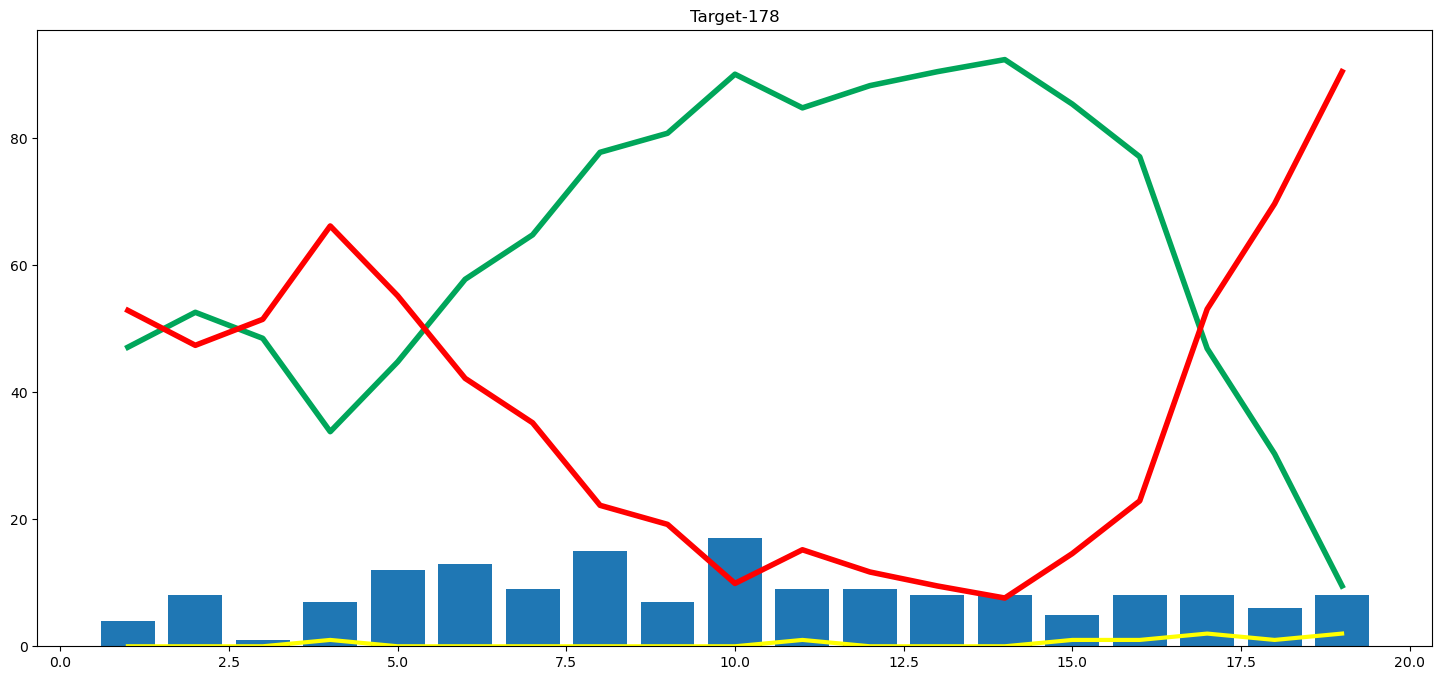

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [68]:
teams

{'Chennai Super Kings',
 'Delhi Capitals',
 'Gujurat Titans',
 'Kings XI Punjab',
 'Kolkata Knight Riders',
 'Lucknow Super Gigants',
 'Mumbai Indians',
 'Rajasthan Royals',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad'}

In [69]:
delivery_df['city'].unique()

array(['Hyderabad', 'Mumbai', 'Indore', 'Kolkata', 'Bangalore',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Cuttack', 'Ahmedabad', 'Nagpur', 'Dharamsala', 'Visakhapatnam',
       'Ranchi', 'Delhi', 'Abu Dhabi', nan, 'Sharjah', 'Pune'],
      dtype=object)

In [70]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

In [71]:
pip install streamlit

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB 660.6 kB/s eta 0:00:13
    --------------------------------------- 0.1/8.1 MB 1.4 MB/s eta 0:00:06
   - -------------------------------------- 0.3/8.1 MB 2.5 MB/s eta 0:00:04
   --- ------------------------------------ 0.7/8.1 MB 4.2 MB/s eta 0:00:02
   ----- ---------------------------------- 1.0/8.1 MB 4.7 MB/s eta 0:00:02
   ------ --------------------------------- 1.2/8.1 MB 4.6 MB/s eta 0:00:02
   ------ --------------------------------- 1.4/8.1 MB 4.5 MB/s eta 0:00:02
   ------- -------------------------------- 1.5/8.1 MB 4.4 MB/s eta 0:00:02
   ------- -------------------------------- 1.5/8.1 MB 4.4 MB/s eta 0:00:02
   ------- -------------------------------- 1.5/8.1 MB 4.4 MB/s eta 0:00:02
   ------- -------------------------------- 1.6/8.1 MB 3.2 MB/s eta 0:00:03
   -------- ------------------------------- 1.8/8.1 MB 3.2 MB/s eta 0:00:02
   --------- ----